In [2]:
%matplotlib inline
import numpy as np
import pylab
from invisible_cities.io.mcinfo_io import load_mcparticles_df
from invisible_cities.io.mcinfo_io import load_mchits_df
from invisible_cities.io.mcinfo_io import load_mcconfiguration
import pandas as pd
from collections import Counter
%config InlineBackend.figure_format = 'svg'


In [43]:
#help(load_mcparticles_df)
# help(mcinfo_io)

In [23]:
# Load the configuration
config = load_mcconfiguration("/Users/mistryk2/Packages/nexus/workdir/files/NextTon_ThermalNeutron_Xe126.next.h5") 
config
# events = int( config[config.param_key.str.contains("num_events")].param_value.iloc[0]  )
# events = config[config.param_key.str.contains("num_events")]
# events = events.param_value.iloc[0]
# print(events)

,param_key,param_value
0,event_type,background
1,num_events,10000
2,saved_events,8343
3,interacting_events,8343
4,/nexus/RegisterGeometry,NextTonScale
5,/nexus/RegisterGenerator,SingleParticleGenerator
6,/nexus/RegisterTrackingAction,DefaultTrackingAction
7,/nexus/RegisterEventAction,DefaultEventAction
8,/nexus/RegisterRunAction,DefaultRunAction
9,/PhysicsList/RegisterPhysics,G4EmStandardPhysics_option4


In [18]:
# Load in the dataframe
# data = load_mcparticles_df("/Users/mistryk2/Packages/nexus/workdir/files/Kr83_full_nexus_ACTIVE_7bar_100ev.sim.h5") 
# data = load_mcparticles_df("/Users/mistryk2/Packages/nexus/workdir/files/NextTon_FastNeutron_Xe131.next.h5") 
data = load_mcparticles_df("../outputs/NextTon_FastNeutron_XeHe_0p1pct.next.h5") 
# data = load_mcparticles_df("../outputs/NextTon_FastNeutron_Xe131.next.h5") 
# print(data.info)

index = 254
xe137 = data.loc[index][data.loc[index].particle_name.str.contains('Xe137')]
# print(xe137)

# data.particle_name.unique()
# print(data.index.get_level_values('event_id').unique())

print(data.particle_name.unique())


['neutron' 'Cu65' 'gamma' 'e-' 'Cu63' 'Cu64' 'e+' 'proton' 'C12' 'triton'
 'deuteron' 'O16' 'Xe136' 'Be9' 'alpha' 'Cr54' 'Fe54' 'Fe57' 'Cr51' 'Cu66'
 'Fe56' 'He3' 'Ni63' 'Cr52' 'Co60' 'Cr53' 'Xe135' 'Xe134' 'Cr50' 'Xe132'
 'Ni58' 'Ni65' 'Ni59' 'C13' 'Fe55' 'Ni61' 'Fe58' 'Xe133' 'Cr55' 'Co62'
 'Xe131' 'Ni60' 'Ni62' 'Mn54' 'N14' 'O17' 'Xe130' 'Be10' 'Xe137'
 'anti_nu_e' 'Cs137[455.491]' 'Cs137' 'V52' 'O18' 'Cu62' 'Co58' 'Xe129'
 'Mn56' 'Fe59' 'Ni64' 'Mn57' 'C14']


In [26]:
# Remove the particle id with large values
data_slim = data.query("event_id==137")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', data_slim.shape[0]+1)
# display(data_slim["particle_name"])
display(data_slim.sort_values(by=['mother_id']))
# display(data_slim)


# xe137_ = data[data['particle_name'].str.contains("Xe137")]
# xe137 = data[data['particle_name'].str.contains("He3")]
# xe137 = data[data['particle_name'].str.contains("triton")]
# print(len(xe137))
# xe137 = data.loc[ (data["creator_proc"] == "nCapture") & (data["particle_name"] != "gamma") & (data["initial_volume"] == "ACTIVE") ]
# xe137 = data.loc[ (data["creator_proc"] == "nCapture") & (data["particle_name"] != "gamma")  ]
# xe137 = data.loc[ (data["kin_energy"] < 10) & (data["particle_name"] == "neutron")]
# xe137 = data_slim.particle_name.str.contains('Xe137')
# display(xe137["kin_energy"].iloc[0])

# pd.set_option('display.max_rows', None)
# display(xe137)
# print(xe137.particle_name.unique())

particle_name  primary  mother_id   initial_x  \
event_id particle_id                                                 
137      1                 neutron     True          0  681.844116   
         3                 neutron    False          1  745.172180   
         4                   gamma    False          1  745.172180   
         5                   gamma    False          1  745.172180   
         6                    Cu63    False          1  745.172180   
         7                   gamma    False          1  745.172180   
         2                     C12    False          1  688.208191   
         8                   gamma    False          1  745.172180   
         76               deuteron    False          3  847.641479   
         77                  gamma    False          3  847.641479   
         75                 proton    False          3  757.527771   
         68                     e-    False          4  -57.893349   
         72                     e-    False          4  -58.264278   
         73                     e-    False          4  -58.264278   
         74                     e-    False          4  -58.264278   
         69                     e-    False          4  -57.893349   
         71                     e-    False          4  -58.264278   
         67                     e-    False          4  -60.363724   
         66                     e-    False          4  -60.329086   
         70                     e-    False          4  -58.264278   
         64                     e-    False          4  -51.014400   
         63                     e-    False          4  -51.014400   
         62                     e-    False          4  -43.924023   
         61                     e-    False          4  -35.780159   
         60                     e-    False          4  -22.285728   
         59                     e-    False          4  -22.285728   
         58                     e-    False          4    3.010122   
         65                     e-    False          4  -60.329086   
         45                     e-    False          5  -53.387199   
         47                     e-    False          5 -876.669067   
         48                     e-    False          5 -879.054443   
         49                  gamma    False          5 -879.054443   
         50                     e-    False          5 -879.054443   
         51                     e-    False          5 -879.054443   
         52                     e-    False          5 -879.054443   
         46                     e-    False          5 -876.669067   
         43                     e-    False          5  414.872528   
         44                     e-    False          5  -53.387199   
         30                     e-    False          7  753.877197   
         31                     e-    False          7  753.877197   
         32                     e-    False          7  761.087036   
         33                     e-    False          7  761.087036   
         34                     e-    False          7  761.087036   
         35                     e-    False          7  755.287903   
         37                     e-    False          7  739.295837   
         38                     e-    False          7  739.295837   
         39                     e-    False          7  739.295837   
         40                     e-    False          7  739.295837   
         41                     e-    False          7  739.295837   
         42                     e-    False          7  739.295837   
         29                     e-    False          7  753.877197   
         36                     e-    False          7  755.287903   
         28                     e-    False          8 -139.423965   
         23                     e-    False          8 -138.145874   
         24                     e-    False          8 -139.423965   
         22                    

In [47]:
xdist = data_slim.loc[ :, ["initial_x", "final_x"]]
xdist['x_disp'] = xdist["initial_x"] - xdist["final_x"]
# xdist

[]

<Figure size 20000x20000 with 0 Axes>

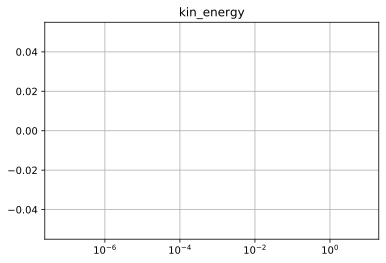

In [48]:
pylab.figure(figsize=(50,50),dpi=400)
xe137.hist(column="kin_energy", bins =1000)
pylab.xlim(25e-9,20)
pylab.semilogx()

43013


[]

<Figure size 20000x20000 with 0 Axes>

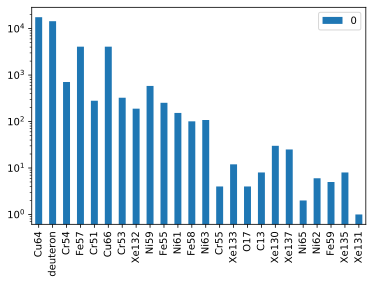

In [64]:
pylab.figure(figsize=(50,50),dpi=400)
elements = Counter(xe137["particle_name"])
print(len(xe137))

df = pd.DataFrame.from_dict(elements, orient='index')
df.plot(kind='bar')
# pylab.xlim(25e-9,20)
pylab.semilogy()